In [1]:
# !pip install -e ..

%load_ext autoreload
%autoreload 2

import pandas as pd
from bokeh.io import output_notebook
output_notebook();
import matplotlib.pyplot as plt

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"

df = pd.read_csv("../test/test_data/TestSpectrumDf.tsv", sep="\t")
df.head(3)

Loading BokehJS ...

,mz,intensity,ion_mobility,ion_annotation,ion_mobility_unit,precursor_mz,precursor_charge,native_id,spectrum,color_peak,custom_annotation,color_annotation,sequence
0,50.9890,10,2,a+,ms,221.08,1,spec_0,A,green,custom1,blue,DMAGCH
1,74.1324,20,4,b3+,ms,221.08,1,spec_0,A,green,custom2,blue,DMAGCH
2,100.5332,25,17,c5+,ms,221.08,1,spec_0,B,red,custom3,red,DMAGCH


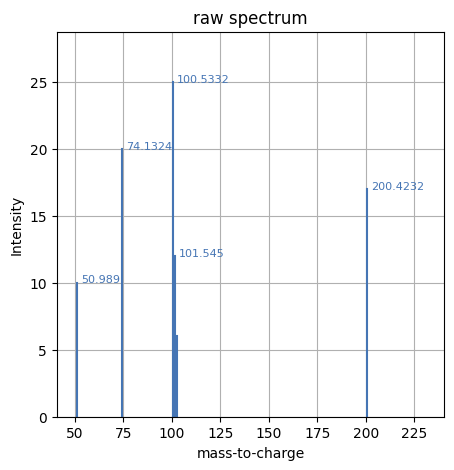

In [2]:
# default settings, top 5 intensity peaks are annotated with m/z
df.plot(x="mz", y="intensity", kind="spectrum", title='raw spectrum', bin_peaks=False)

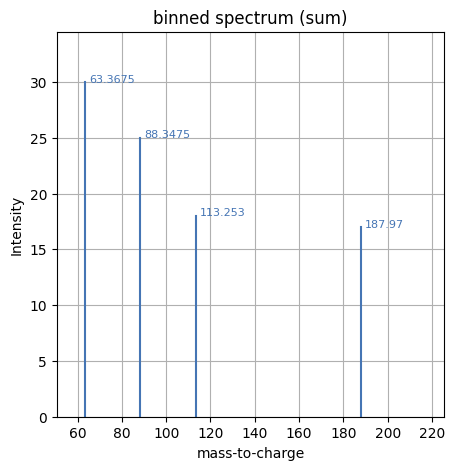

In [3]:
# default settings, top 5 intensity peaks are annotated with m/z
df.plot(x="mz", y="intensity", kind="spectrum", 
        title='binned spectrum (sum)', bin_peaks='auto', 
        aggregation_method="sum")

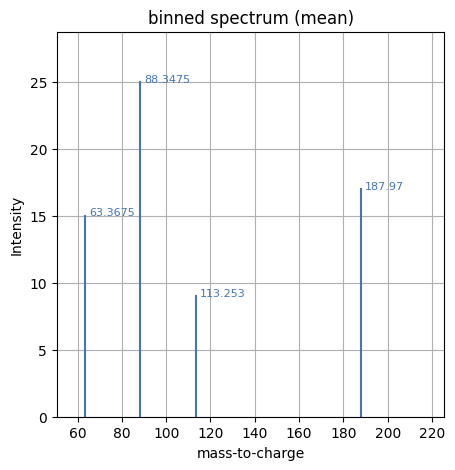

In [4]:
# default settings, top 5 intensity peaks are annotated with m/z
df.plot(x="mz", y="intensity", kind="spectrum", 
        title='binned spectrum (mean)', bin_peaks='auto', 
        aggregation_method="mean")

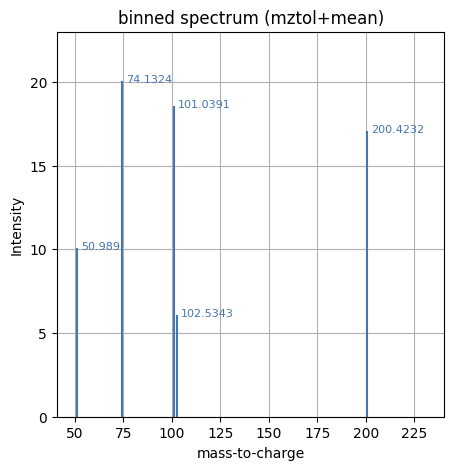

In [5]:
# default settings, top 5 intensity peaks are annotated with m/z
p4 = df.plot(x="mz", y="intensity", kind="spectrum", title='binned spectrum (mztol+mean)',
        bin_peaks='auto', bin_method="mz-tol-bin", mz_tol=2,
        aggregation_method="mean")

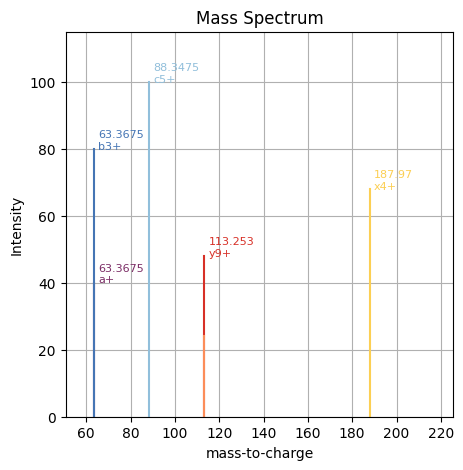

In [6]:
# ion annotations with default colors and relative intensite
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", relative_intensity=True)

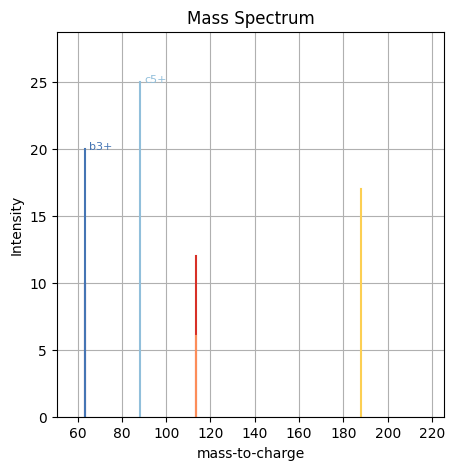

In [7]:
# annotating top 2 intensity peaks only and hiding m/z annotations(default is 5)
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", annotate_mz=False, annotate_top_n_peaks=2)

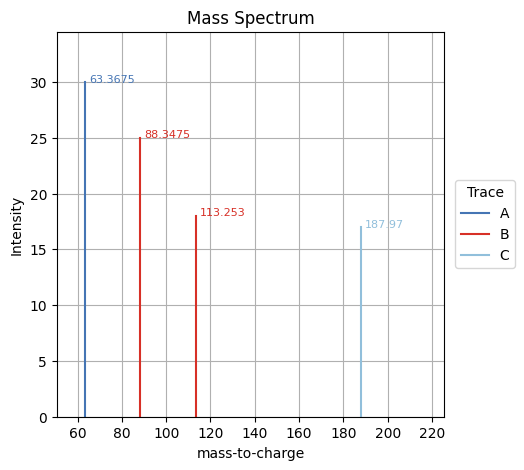

In [8]:
# grouping peaks, each group gets different color, show legend
df.plot(x="mz", y="intensity", kind="spectrum", by="spectrum")

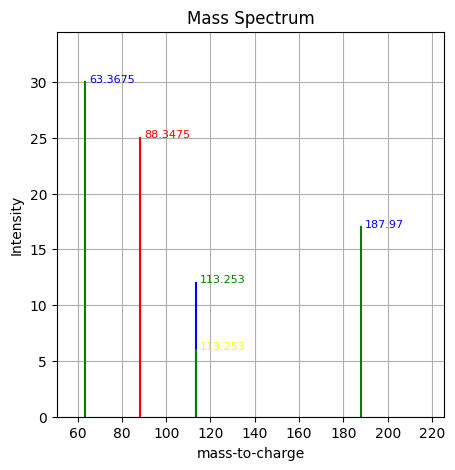

In [9]:
# custom annotation and peak colors based on columns in dataframe
df.plot(x="mz", y="intensity", kind="spectrum",
       annotation_color="color_annotation", peak_color="color_peak")

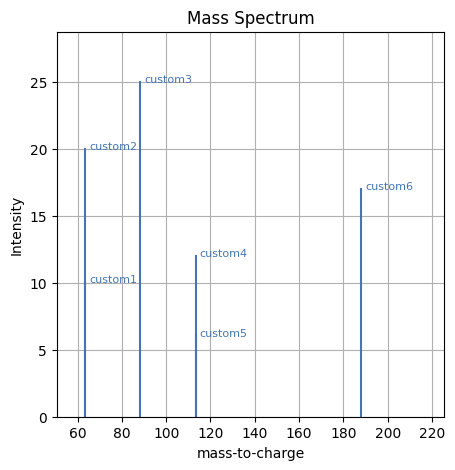

In [10]:
# custom annoation for all peaks without mz annotation
df.plot(x="mz", y="intensity", kind="spectrum",
       custom_annotation="custom_annotation", annotate_mz=False, annotate_top_n_peaks="all")

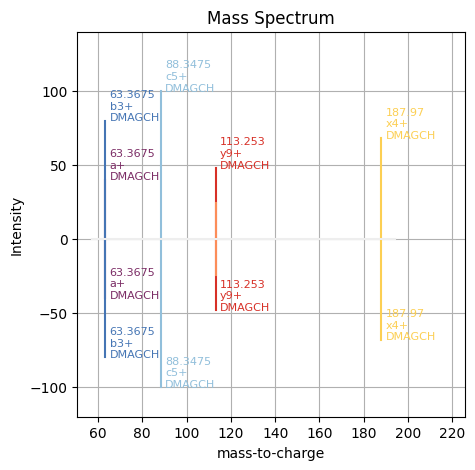

In [11]:
# mirror a reference spectrum with ion and sequence annoations
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", sequence_annotation="sequence",
        reference_spectrum=df, mirror_spectrum=True)